In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
import math
import importlib
import mcmc_functions
importlib.reload(mcmc_functions)

from mcmc_functions import *
import importlib

seasons_missing_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/premier-league-matches.csv')
tables_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/pl-tables-1993-2024.csv')
recent_df = pd.read_csv('matches.csv')
recent_df = recent_df[recent_df['Venue'] == 'Home']

converted_recent_df = convert_match_data(recent_df)
converted_recent_df = converted_recent_df.sort_values(by='Wk').reset_index(drop=True)

seasons_df = pd.concat([seasons_missing_df, converted_recent_df], ignore_index=True)

In [51]:
twenty_two_season = seasons_df[seasons_df['Season_End_Year'] == 2022]
twenty_three_season = seasons_df[seasons_df['Season_End_Year'] == 2023]

In [52]:
lambda_h = np.mean([twenty_two_season['HomeGoals'].mean(), twenty_three_season['HomeGoals'].mean()])
lambda_a = np.mean([twenty_two_season['AwayGoals'].mean(), twenty_three_season['AwayGoals'].mean()])

synthetic_mu_p = 0
synthetic_sigma_p = 0.1
synthetic_eta = 1
synthetic_sigma_s = 0.1

print(f'Average Home Goals: {lambda_h}')
print(f'Average Away Goals: {lambda_a}')

Average Home Goals: 1.5736842105263158
Average Away Goals: 1.2618421052631579


In [53]:
joined_twenty_two, twenty_two_strengths = sample_initial_strengths(twenty_two_season)
twenty_two_s = add_scores(joined_twenty_two, lambda_h, lambda_a)

twenty_three_teams = sorted(twenty_three_season['Home'][:100].unique())
joined_twenty_three, twenty_three_strengths = sample_prior_strengths(twenty_three_season, twenty_two_strengths, twenty_three_teams, 
                                                                     mu_p = synthetic_mu_p, sigma_p = synthetic_sigma_p,
                                                                     eta = synthetic_eta, sigma_s = synthetic_sigma_s)
twenty_three_s = add_scores(joined_twenty_three, lambda_h, lambda_a)

synthetic_seasons = pd.concat([twenty_two_s, twenty_three_s], ignore_index=True)


In [54]:
joined_twenty_three

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,Team Name_x,HomeStrength,Team Name_y,AwayStrength,Sampled Score,LogLikelihood
0,2023,1,2022-08-05,Crystal Palace,0,2,Arsenal,A,Crystal Palace,0.095420,Arsenal,0.121946,"[1, 1]",-2.142259
1,2023,1,2022-08-06,Fulham,2,2,Liverpool,D,Fulham,-0.016359,Liverpool,-0.042655,"[0, 1]",-2.638431
2,2023,1,2022-08-06,Tottenham,4,1,Southampton,H,Tottenham,0.051307,Southampton,0.023560,"[0, 2]",-3.128767
3,2023,1,2022-08-06,Newcastle Utd,2,0,Nott'ham Forest,H,Newcastle Utd,-0.061863,Nott'ham Forest,-0.015149,"[0, 0]",-2.824048
4,2023,1,2022-08-06,Leeds United,2,1,Wolves,H,Leeds United,0.224400,Wolves,0.176056,"[3, 2]",-3.465081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2023,38,2023-05-28,Everton,1,0,Bournemouth,H,Everton,-0.062041,Bournemouth,0.029995,"[0, 0]",-2.818803
376,2023,38,2023-05-28,Leicester City,2,1,West Ham,H,Leicester City,-0.065100,West Ham,-0.080870,"[3, 2]",-3.484530
377,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H,Aston Villa,-0.124170,Brighton,-0.014195,"[1, 1]",-2.132335
378,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A,Leeds United,0.224400,Tottenham,0.051307,"[1, 0]",-2.305845


In [55]:
synthetic_seasons[['HomeGoals', 'AwayGoals']] = pd.DataFrame(
    synthetic_seasons['Sampled Score'].tolist(),
    index=synthetic_seasons.index
)

# Select only the desired columns
synthetic_seasons = synthetic_seasons[
    ['Season_End_Year', 'Wk', 'Date', 'Home', 'HomeGoals', 'AwayGoals', 'Away', 'FTR']
]

In [56]:
compute_league_table(synthetic_seasons[synthetic_seasons['Season_End_Year'] == 2023])

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:1099: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fillna(0)


,Team,MP,W,D,L,GF,GA,GD,PTS
0,Leeds United,38,30,5,3,84,32,52,95
1,Wolves,38,20,11,7,65,41,24,71
2,Arsenal,38,20,7,11,74,55,19,67
3,Fulham,38,17,9,12,56,56,0,60
4,Crystal Palace,38,16,10,12,62,51,11,58
5,Bournemouth,38,15,13,10,52,50,2,58
6,Brentford,38,16,7,15,54,52,2,55
7,Brighton,38,14,9,15,57,60,-3,51
8,Nott'ham Forest,38,12,14,12,58,51,7,50
9,Manchester Utd,38,13,10,15,54,48,6,49


In [ ]:
strength_dict, parameters, acceptance_counters, tracked_parameters, strength_dict_original, parameters_original = (
mcmc(synthetic_seasons, 2022, 2023, burn_in = 15000, iterations = 50000))

In [12]:
acceptance_counters

{'Strength': {'accepted': 19709, 'total': 39874},
 'Home Advantage': {'accepted': 86,
  'total': 2505,
  'percentage': 3.43313373253493},
 'Away Advantage': {'accepted': 71,
  'total': 2546,
  'percentage': 2.788688138256088},
 'Mu_P': {'accepted': 12, 'total': 2555, 'percentage': 0.46966731898238745},
 'Sigma_P': {'accepted': 12, 'total': 2555, 'percentage': 0.46966731898238745},
 'Eta': {'accepted': 75, 'total': 2520, 'percentage': 2.976190476190476},
 'Sigma_S': {'accepted': 75, 'total': 2520, 'percentage': 2.976190476190476}}

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


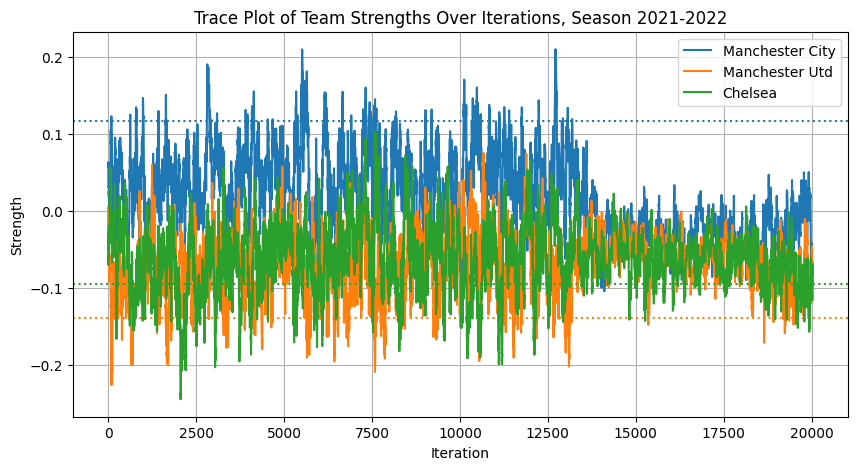

In [27]:
trace_plot_strength(strength_dict, ['Manchester City', 'Manchester Utd', 'Chelsea'], 2022, true_strengths = twenty_two_strengths)

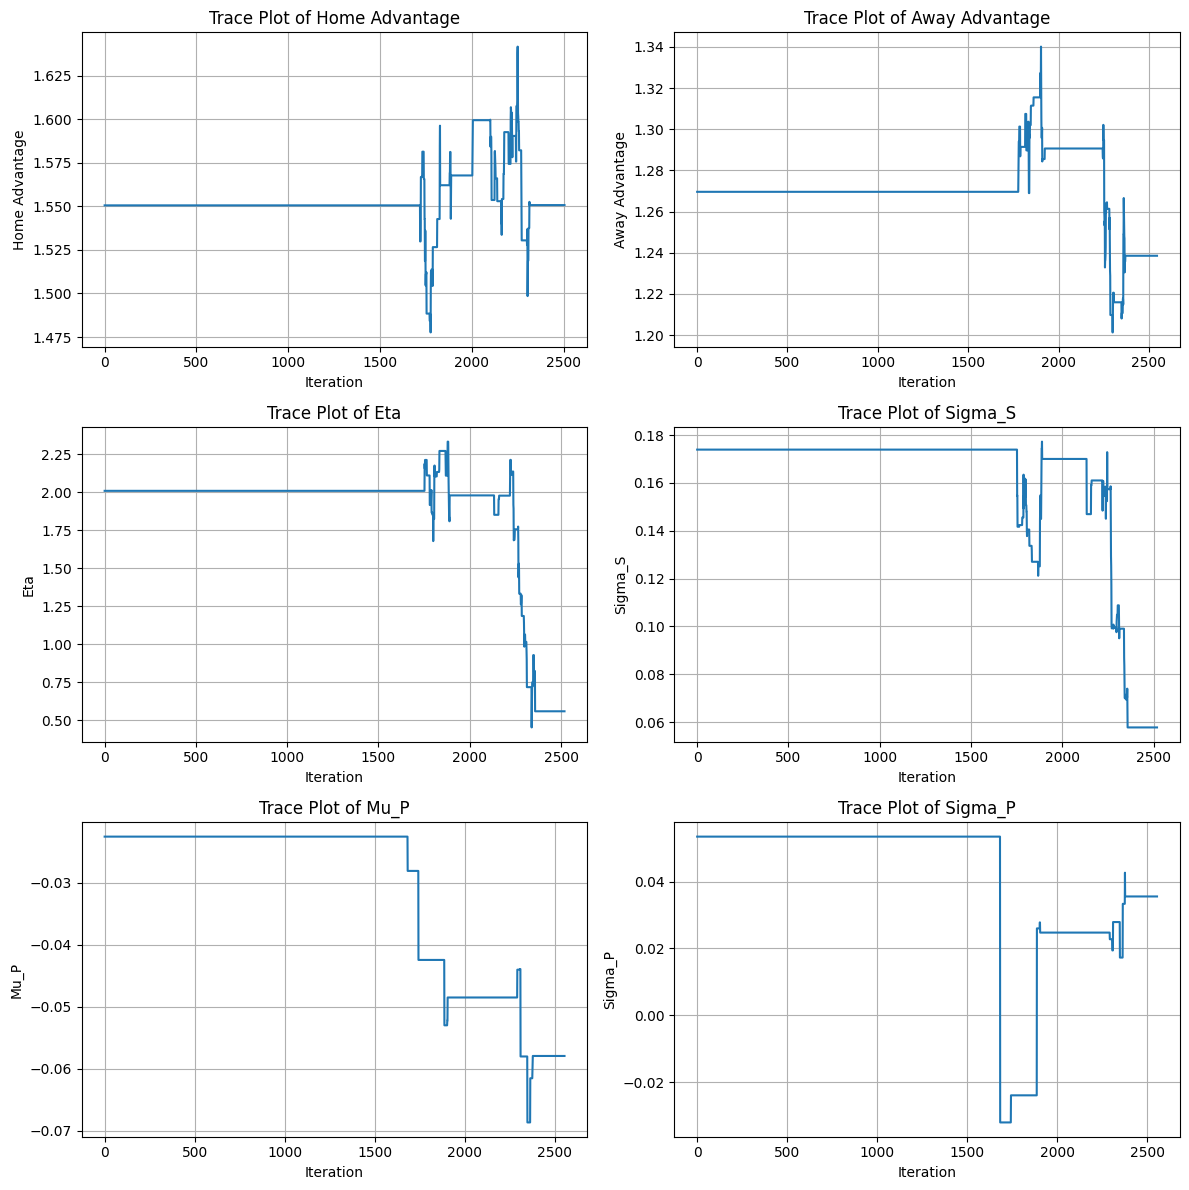

In [15]:
trace_plot_parameter(parameters)

Changed Version
